<a href="https://colab.research.google.com/github/M1ffka/neural-network-for-image-recognition/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Обучение полносвязной нейронной сети



In [ ]:
!git clone https://github.com/M1ffka/neural-network-for-image-recognition.git

Cloning into 'neural-network-for-image-recognition'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


### Загрузка пакетов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

### Скачиваем данные

In [ ]:
import tensorflow as tf


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = torch.from_numpy(train_images)
train_labels = torch.from_numpy(train_labels).type(torch.LongTensor)
test_images = torch.from_numpy(test_images)
test_labels = torch.from_numpy(test_labels).type(torch.LongTensor)
train_images = train_images / 255
test_images = test_images / 255
train_images = train_images.float()
test_images = test_images.float()

### Визуализация

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
              }
    input = (label.item() if type(label) == torch.Tensor else label)

    return output_mapping[input]


T-shirt/Top


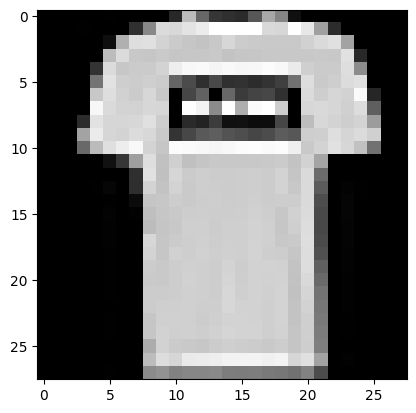

In [ ]:
plt.imshow(train_images[1].squeeze(), cmap="gray")
print(output_label(train_labels[1]))

### Гистограмма распределения


([<matplotlib.axis.XTick at 0x78e49ae074c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

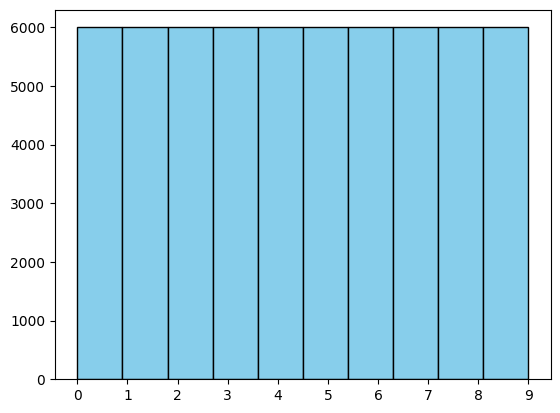

In [ ]:
plt.hist(train_labels, bins=10, color='skyblue', edgecolor='black')
plt.xticks(range(10))

Дисбаланс не присутствует, так как количество каждого класса в датасете одинаково.

### Класс Dataset

In [ ]:
class fashionDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y


  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    image = self.X[index]
    label = self.y[index]

    return image, label

### Экземпляры DataLoaders

In [ ]:
train = fashionDataset(train_images, train_labels)
test = fashionDataset(test_images, test_labels)

batch_size = 100
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)


### Нейронная сеть

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        return out
input_size = 784  # Размер изображения
hidden_size = 100
num_classes = 10     # Количество классов (классов одежды в FashionMNIST)

model = ANNModel(input_size, hidden_size, num_classes)

### Функция ошибки и оптимизатор

In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

### Обучение

In [ ]:
num_epochs = 10 # можно менять
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (train_images, train_labels) in enumerate(train_loader):
      optimizer.zero_grad()
      outputs = model(train_images)
      loss = criterion(outputs, train_labels)
      loss.backward()
      optimizer.step()
      count += 1

      if count % 50 == 0:
        correct = 0
        total = 0
        for test_images, test_labels in test_loader:
          outputs = model(test_images)
          predicted = torch.max(outputs.data, 1)[1]
          total += len(test_labels)
          correct += (predicted == test_labels).sum()

      if total > 0:
        accuracy = 100 * correct / float(total)
      else:
        accuracy = 0
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

      if (i+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, accuracy: {accuracy:.4f}')

Epoch [1/10], Step [100/600], Loss: 0.6915, accuracy: 77.1800
Epoch [1/10], Step [200/600], Loss: 0.6055, accuracy: 77.3000
Epoch [1/10], Step [300/600], Loss: 0.6218, accuracy: 77.2700
Epoch [1/10], Step [400/600], Loss: 0.5763, accuracy: 77.3000
Epoch [1/10], Step [500/600], Loss: 0.6293, accuracy: 77.4200
Epoch [1/10], Step [600/600], Loss: 0.6510, accuracy: 77.4800
Epoch [2/10], Step [100/600], Loss: 0.6531, accuracy: 77.6300
Epoch [2/10], Step [200/600], Loss: 0.5661, accuracy: 77.7600
Epoch [2/10], Step [300/600], Loss: 0.5831, accuracy: 77.6900
Epoch [2/10], Step [400/600], Loss: 0.5456, accuracy: 77.6800
Epoch [2/10], Step [500/600], Loss: 0.7072, accuracy: 77.8400
Epoch [2/10], Step [600/600], Loss: 0.5784, accuracy: 77.7000
Epoch [3/10], Step [100/600], Loss: 0.6517, accuracy: 78.0000
Epoch [3/10], Step [200/600], Loss: 0.4193, accuracy: 77.9900
Epoch [3/10], Step [300/600], Loss: 0.8690, accuracy: 77.9500
Epoch [3/10], Step [400/600], Loss: 0.6406, accuracy: 78.2300
Epoch [3

### Валидация результатов

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Точность модели на тестовом наборе: {(correct / total) * 100:.2f}%')

Точность модели на тестовом наборе: 80.53%
